# Hypothesis testing

## **µ**
Es la media de la población the mean of the population

# Chi cuadrado

In [7]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.0/960.0 kB 8.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 kB 5.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.6/500.6 kB 8.7 MB/s eta 0:0

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin

In [9]:
df = pd.read_csv('Data/chicago_crime_data.csv', dtype={'ID': object, 'beat_num': object})
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,43.0,7,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,42.0,8,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"


In [10]:
df["Primary Type"].drop_duplicates()

0                                  BURGLARY
1                                   BATTERY
2                                     THEFT
3                           CRIMINAL DAMAGE
5                                 NARCOTICS
7                             OTHER OFFENSE
9                        DECEPTIVE PRACTICE
12                        WEAPONS VIOLATION
16                                  ASSAULT
18                        CRIMINAL TRESPASS
20                   PUBLIC PEACE VIOLATION
29                      CRIM SEXUAL ASSAULT
49                      MOTOR VEHICLE THEFT
65                                  ROBBERY
110              OFFENSE INVOLVING CHILDREN
135        INTERFERENCE WITH PUBLIC OFFICER
139                    LIQUOR LAW VIOLATION
331                                STALKING
397                              KIDNAPPING
496                                   ARSON
561                             SEX OFFENSE
985       CONCEALED CARRY LICENSE VIOLATION
1301                           I

In [11]:
df["Location Description"].drop_duplicates()

0                   APARTMENT
1         MOVIE HOUSE/THEATER
2                 HOTEL/MOTEL
3                      STREET
4                   RESIDENCE
                 ...         
148447              VESTIBULE
150685                GANGWAY
190713            CHA HALLWAY
193432           NURSING HOME
233178                   CLUB
Name: Location Description, Length: 128, dtype: object

In [12]:
dict_Locations = {'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT EXTERIOR - SECURE AREA': 'Airport & Related',
 'AIRCRAFT': 'Airport & Related',
 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA': 'Airport & Related',
 'AIRPORT PARKING LOT': 'Airport & Related',
 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'Airport & Related',
 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 'Airport & Related',
 'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'Airport & Related',
 'AIRPORT VENDING ESTABLISHMENT': 'Airport & Related',
 'AIRPORT/AIRCRAFT': 'Airport & Related',
 'AIRPORT EXTERIOR - NON-SECURE AREA': 'Airport & Related',
 'HOSPITAL BUILDING/GROUNDS': 'Hospitals & Related',
 'MEDICAL/DENTAL OFFICE': 'Hospitals & Related',
 'NURSING HOME': 'Hospitals & Related',
 'ANIMAL HOSPITAL': 'Hospitals & Related',
 'NURSING HOME/RETIREMENT HOME': 'Hospitals & Related',
 'STAIRWELL': 'Residential & Related',
 'DRIVEWAY - RESIDENTIAL': 'Residential & Related',
 'RESIDENCE-GARAGE': 'Residential & Related',
 'HOUSE': 'Residential & Related',
 'PORCH': 'Residential & Related',
 'CHA HALLWAY': 'Residential & Related',
 'CHA APARTMENT': 'Residential & Related',
 'BASEMENT': 'Residential & Related',
 'CHA PARKING LOT/GROUNDS': 'Residential & Related',
 'RESIDENCE PORCH/HALLWAY': 'Residential & Related',
 'APARTMENT': 'Residential & Related',
 'GARAGE': 'Residential & Related',
 'RESIDENCE': 'Residential & Related',
 'ROOMING HOUSE': 'Residential & Related',
 'CHA HALLWAY/STAIRWELL/ELEVATOR': 'Residential & Related',
 'HOTEL/MOTEL': 'Residential & Related',
 'CHA PARKING LOT': 'Residential & Related',
 'RESIDENTIAL YARD (FRONT/BACK)': 'Residential & Related',
 'COLLEGE/UNIVERSITY RESIDENCE HALL': 'Colleges & Related',
 'SCHOOL, PUBLIC, GROUNDS': 'Colleges & Related',
 'SCHOOL, PRIVATE, GROUNDS': 'Colleges & Related',
 'SCHOOL YARD': 'Colleges & Related',
 'DAY CARE CENTER': 'Colleges & Related',
 'COLLEGE/UNIVERSITY GROUNDS': 'Colleges & Related',
 'SCHOOL, PUBLIC, BUILDING': 'Colleges & Related',
 'SCHOOL, PRIVATE, BUILDING': 'Colleges & Related',
 'JAIL / LOCK-UP FACILITY': 'Goverment Buildings & Related',
 'GOVERNMENT BUILDING/PROPERTY': 'Goverment Buildings & Related',
 'POLICE FACILITY/VEH PARKING LOT': 'Goverment Buildings & Related',
 'FIRE STATION': 'Goverment Buildings & Related',
 'PARK PROPERTY': 'Goverment Buildings & Related',
 'FEDERAL BUILDING': 'Goverment Buildings & Related',
 'FOREST PRESERVE': 'Goverment Buildings & Related',
 'LIBRARY': 'Goverment Buildings & Related',
 'TAVERN/LIQUOR STORE': 'Liquor Stores & Related',
 'CLUB': 'Liquor Stores & Related',
 'TAVERN': 'Liquor Stores & Related',
 'POOL ROOM': 'Liquor Stores & Related',
 'BAR OR TAVERN': 'Liquor Stores & Related',
 'ATHLETIC CLUB': 'Stores & Related',
 'BARBERSHOP': 'Stores & Related',
 'CONVENIENCE STORE': 'Stores & Related',
 'SMALL RETAIL STORE': 'Stores & Related',
 'RESTAURANT': 'Stores & Related',
 'DRUG STORE': 'Stores & Related',
 'FACTORY/MANUFACTURING BUILDING': 'Stores & Related',
 'MOVIE HOUSE/THEATER': 'Stores & Related',
 'RETAIL STORE': 'Stores & Related',
 'PARKING LOT': 'Stores & Related',
 'DEPARTMENT STORE': 'Stores & Related',
 'GAS STATION': 'Stores & Related',
 'VESTIBULE': 'Stores & Related',
 'CAR WASH': 'Stores & Related',
 'CLEANING STORE': 'Stores & Related',
 'GAS STATION DRIVE/PROP.': 'Stores & Related',
 'NEWSSTAND': 'Stores & Related',
 'COIN OPERATED MACHINE': 'Stores & Related',
 'APPLIANCE STORE': 'Stores & Related',
 'COMMERCIAL / BUSINESS OFFICE': 'Stores & Related',
 'BOWLING ALLEY': 'Stores & Related',
 'GROCERY FOOD STORE': 'Stores & Related',
 'GANGWAY': 'Vehicles & Related',
 'VEHICLE - DELIVERY TRUCK': 'Vehicles & Related',
 'BOAT/WATERCRAFT': 'Vehicles & Related',
 'TAXICAB': 'Vehicles & Related',
 'VEHICLE-COMMERCIAL': 'Vehicles & Related',
 'OTHER COMMERCIAL TRANSPORTATION': 'Vehicles & Related',
 'AUTO': 'Vehicles & Related',
 'AUTO / BOAT / RV DEALERSHIP': 'Vehicles & Related',
 'VEHICLE - OTHER RIDE SERVICE': 'Vehicles & Related',
 'VEHICLE NON-COMMERCIAL': 'Vehicles & Related',
 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)': 'Vehicles & Related',
 'CTA BUS': 'Public Transport & Related',
 'CTA TRAIN': 'Public Transport & Related',
 'OTHER RAILROAD PROP / TRAIN DEPOT': 'Public Transport & Related',
 'CTA BUS STOP': 'Public Transport & Related',
 'CTA PROPERTY': 'Public Transport & Related',
 'CTA STATION': 'Public Transport & Related',
 'CTA PLATFORM': 'Public Transport & Related',
 'CTA "L" PLATFORM': 'Public Transport & Related',
 'CTA GARAGE / OTHER PROPERTY': 'Public Transport & Related',
 'CTA TRACKS - RIGHT OF WAY': 'Public Transport & Related',
 'ALLEY': 'Street & Related',
 'BRIDGE': 'Street & Related',
 'CEMETARY': 'Street & Related',
 'CHURCH': 'Street & Related',
 'SIDEWALK': 'Street & Related',
 'HALLWAY': 'Street & Related',
 'ABANDONED BUILDING': 'Street & Related',
 'SPORTS ARENA/STADIUM': 'Street & Related',
 'CONSTRUCTION SITE': 'Street & Related',
 'DRIVEWAY': 'Street & Related',
 'YARD': 'Street & Related',
 'VACANT LOT': 'Street & Related',
 'STREET': 'Street & Related',
 'LAKEFRONT/WATERFRONT/RIVERBANK': 'Street & Related',
 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP': 'Street & Related',
 'HIGHWAY/EXPRESSWAY': 'Street & Related',
 'VACANT LOT/LAND': 'Street & Related',
 'PARKING LOT/GARAGE(NON.RESID.)': 'Street & Related',
 'CREDIT UNION': 'Bank & Related',
 'CURRENCY EXCHANGE': 'Bank & Related',
 'PAWN SHOP': 'Bank & Related',
 'RIVER BANK': 'Bank & Related',
 'SAVINGS AND LOAN': 'Bank & Related',
 'WAREHOUSE': 'Bank & Related',
 'ATM (AUTOMATIC TELLER MACHINE)': 'Bank & Related',
 'BANK': 'Bank & Related',
 'OTHER': 'Other Locations'}

dict_Offenses = {'CRIMINAL TRESPASS': 'Theft Related',
 'MOTOR VEHICLE THEFT': 'Theft Related',
 'BURGLARY': 'Theft Related',
 'ROBBERY': 'Theft Related',
 'THEFT': 'Theft Related',
 'ARSON': 'Property Damage',
 'CRIMINAL DAMAGE': 'Property Damage',
 'HOMICIDE': 'Violence & Related',
 'KIDNAPPING': 'Violence & Related',
 'ASSAULT': 'Violence & Related',
 'BATTERY': 'Violence & Related',
 'OFFENSE INVOLVING CHILDREN': 'Sexual Offenses & Related',
 'SEX OFFENSE': 'Sexual Offenses & Related',
 'HUMAN TRAFFICKING': 'Sexual Offenses & Related',
 'PROSTITUTION': 'Sexual Offenses & Related',
 'CRIM SEXUAL ASSAULT': 'Sexual Offenses & Related',
 'PUBLIC INDECENCY': 'Sexual Offenses & Related',
 'OBSCENITY': 'Sexual Offenses & Related',
 'STALKING': 'Sexual Offenses & Related',
 'INTIMIDATION': 'Dangerous practices',
 'INTERFERENCE WITH PUBLIC OFFICER': 'Dangerous practices',
 'WEAPONS VIOLATION': 'Dangerous practices',
 'CONCEALED CARRY LICENSE VIOLATION': 'Dangerous practices',
 'DECEPTIVE PRACTICE': 'Dangerous practices',
 'LIQUOR LAW VIOLATION': 'Substances & Related',
 'GAMBLING': 'Substances & Related',
 'OTHER NARCOTIC VIOLATION': 'Substances & Related',
 'NARCOTICS': 'Substances & Related',
 'OTHER OFFENSE': 'Other Offenses',
 'PUBLIC PEACE VIOLATIONNON-CRIMINAL': 'Other Offenses',
 'NON-CRIMINAL (SUBJECT SPECIFIED)': 'Other Offenses'}

In [13]:
df["Offenses_cat"]=df["Primary Type"].replace(dict_Offenses)
df["Location_cat"]=df["Location Description"].replace(dict_Locations)

df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Offenses_cat,Location_cat
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)",Theft Related,Residential & Related
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)",Violence & Related,Stores & Related
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)",Theft Related,Residential & Related
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)",Property Damage,Street & Related
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)",Violence & Related,Residential & Related


In [14]:
my_contingency_table = pd.crosstab(index=df["Offenses_cat"], columns=df["Location_cat"])
my_contingency_table

Location_cat,Airport & Related,Bank & Related,Colleges & Related,Goverment Buildings & Related,Hospitals & Related,Liquor Stores & Related,Other Locations,Public Transport & Related,Residential & Related,Stores & Related,Street & Related,Vehicles & Related
Offenses_cat,,,,,,,,,,,,
Dangerous practices,252,1536,179,206,142,226,2331,439,9460,3312,5409,582
NON-CRIMINAL,4,1,0,3,1,1,3,1,13,0,8,2
Other Offenses,60,25,252,230,150,48,1355,36,9555,831,4431,264
PUBLIC PEACE VIOLATION,26,1,137,53,19,4,47,36,258,82,827,8
Property Damage,34,117,334,274,111,99,816,543,12147,1665,12644,703
Sexual Offenses & Related,9,6,280,131,149,33,241,101,3429,112,1363,119
Substances & Related,60,7,190,692,97,107,149,163,1889,360,7707,631
Theft Related,620,521,1221,1377,731,1272,4605,2714,28834,21194,41780,2564
Violence & Related,180,122,2984,1022,917,766,1780,1297,32103,4246,22964,1006


Notice how the concat() function outputs counts by default. We can make it show percentages with the normalize argument. You can normalize in one of two ways:

- taking the sum of each column and dividing the respective column values by that sum (normalize="columns"); or
- taking the sum of each row and dividing all the respective row values by that sum (normalize="index")

In [22]:
pd.crosstab(index= df["Offenses_cat"], columns = df["Location_cat"], normalize = 'columns')*100

Location_cat,Airport & Related,Bank & Related,Colleges & Related,Goverment Buildings & Related,Hospitals & Related,Liquor Stores & Related,Other Locations,Public Transport & Related,Residential & Related,Stores & Related,Street & Related,Vehicles & Related
Offenses_cat,,,,,,,,,,,,
Dangerous practices,20.240964,65.753425,3.209611,5.165496,6.128615,8.841941,20.579147,8.236398,9.683892,10.414439,5.568653,9.899643
NON-CRIMINAL,0.321285,0.042808,0.000000,0.075226,0.043159,0.039124,0.026485,0.018762,0.013308,0.000000,0.008236,0.034019
Other Offenses,4.819277,1.070205,4.518558,5.767302,6.473889,1.877934,11.962567,0.675422,9.781140,2.613043,4.561786,4.490560
PUBLIC PEACE VIOLATION,2.088353,0.042808,2.456518,1.328987,0.820026,0.156495,0.414938,0.675422,0.264106,0.257845,0.851410,0.136078
Property Damage,2.730924,5.008562,5.988883,6.870612,4.790678,3.873239,7.204026,10.187617,12.434485,5.235520,13.017203,11.957816
Sexual Offenses & Related,0.722892,0.256849,5.020620,3.284855,6.430729,1.291080,2.127660,1.894934,3.510155,0.352179,1.403231,2.024154
Substances & Related,4.819277,0.299658,3.406850,17.352056,4.186448,4.186228,1.315441,3.058161,1.933707,1.132004,7.934482,10.733118
Theft Related,49.799197,22.303082,21.893491,34.528586,31.549417,49.765258,40.655072,50.919325,29.516420,66.643607,43.013188,43.612859
Violence & Related,14.457831,5.222603,53.505469,25.626881,39.577039,29.968701,15.714664,24.333959,32.862788,13.351362,23.641811,17.111754


In [23]:
pd.crosstab(index= df["Offenses_cat"][df["Offenses_cat"] =='Property Damage'], columns = df["Location_cat"], normalize = 'index')*100

Location_cat,Airport & Related,Bank & Related,Colleges & Related,Goverment Buildings & Related,Hospitals & Related,Liquor Stores & Related,Other Locations,Public Transport & Related,Residential & Related,Stores & Related,Street & Related,Vehicles & Related
Offenses_cat,,,,,,,,,,,,
Property Damage,0.115305,0.396785,1.132703,0.929223,0.376437,0.335741,2.767321,1.841489,41.194425,5.646556,42.879913,2.384101


<AxesSubplot: xlabel='Location_cat', ylabel='Offenses_cat'>

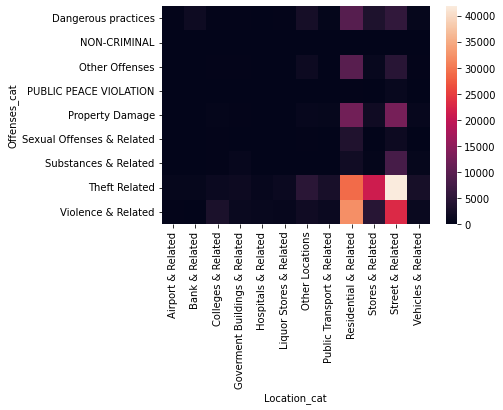

In [24]:
sns.heatmap(my_contingency_table)

<AxesSubplot: xlabel='Location_cat', ylabel='Offenses_cat'>

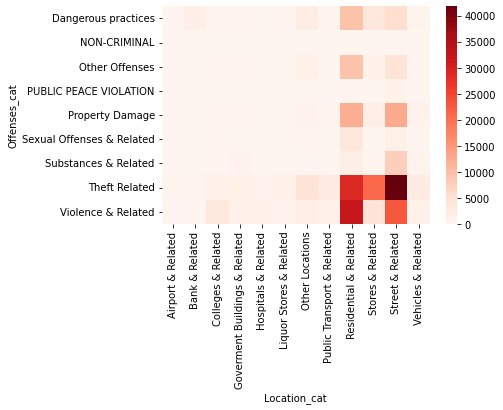

In [25]:
sns.heatmap(my_contingency_table, cmap="Reds")

Text(0.5, 1.0, 'Primary type vs. Location description (counts)')

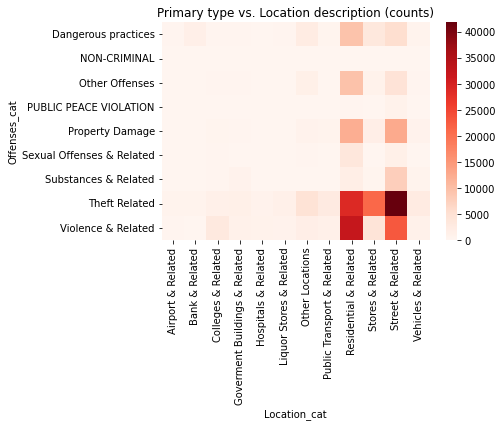

In [26]:
ax = sns.heatmap(my_contingency_table, cmap="Reds")
ax.set_title("Primary type vs. Location description (counts)")

graficamos la anterior

<AxesSubplot: xlabel='Location_cat', ylabel='Offenses_cat'>

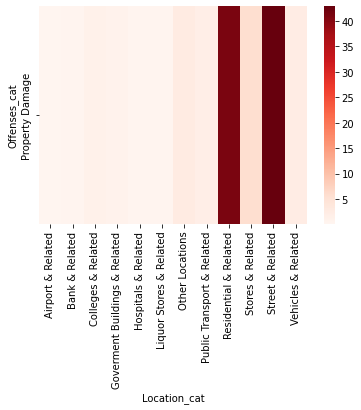

In [31]:
sns.heatmap(pd.crosstab(index= df["Offenses_cat"][df["Offenses_cat"] =='Property Damage'], columns = df["Location_cat"], normalize = 'index')*100, cmap='Reds')

# t test

In [34]:
# Importing dataset A, which is a Series of integers
A = pd.read_csv("Data/A.csv")
A.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       244 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


In [35]:
# Here, A["A"] is the Series, our sample (its mean is 39.6, and the sample size is 244)
# And 56 is the value to compare with
pingouin.ttest(A["A"], 56)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-13.153916,243,two-sided,3.348320e-30,"[37.11, 42.03]",0.842093,9.248e+26,1.0


In [36]:
# Importing dataset B, which is another Series of integers
B = pd.read_csv("Data/B.csv")

# Here, B["B"] is the second Series (its mean is 37.15, and the sample size is 215)
pingouin.ttest(A["A"],  B["B"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.296085,445.251887,two-sided,0.195618,"[-1.25, 6.07]",0.121509,0.234,0.254013


In [37]:
# Importing dataset C, which is another Series of integers
C = pd.read_csv("Data/C.csv")

In [41]:
pingouin.ttest(A["A"],  C["C"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.761048,335.579104,two-sided,0.0002,"[-12.9, -4.04]",0.379362,92.329,0.973112


In [42]:
chi2_contingency(my_contingency_table)

(44488.39718471101,
 0.0,
 88,
 array([[1.12180382e+02, 2.10484636e+02, 5.02514047e+02, 3.59337640e+02,
         2.08772646e+02, 2.30307675e+02, 1.02061621e+03, 4.80258180e+02,
         8.80215030e+03, 2.86551044e+03, 8.75214217e+03, 5.29725674e+02],
        [1.72413148e-01, 3.23499689e-01, 7.72327811e-01, 5.52276011e-01,
         3.20868485e-01, 3.53966270e-01, 1.56861343e+00, 7.38122151e-01,
         1.35282695e+01, 4.40408267e+00, 1.34514107e+01, 8.14150117e-01],
        [8.03212278e+01, 1.50707139e+02, 3.59800391e+02, 2.57285989e+02,
         1.49481353e+02, 1.64900448e+02, 7.30761885e+02, 3.43865176e+02,
         6.30234546e+03, 2.05170738e+03, 6.26653961e+03, 3.79283934e+02],
        [6.98040258e+00, 1.30973658e+01, 3.12688395e+01, 2.23597152e+01,
         1.29908376e+01, 1.43308506e+01, 6.35076466e+01, 2.98839725e+01,
         5.47712102e+02, 1.78305834e+02, 5.44600356e+02, 3.29620777e+01],
        [1.37403959e+02, 2.57811766e+02, 6.15503518e+02, 4.40134128e+02,
         2.55714

In [43]:
chi2_contingency(my_contingency_table)[1]

0.0

In [44]:
subset_df = df[
    (df['Location_cat'] == 'Residential & Related') &
    (df['Offenses_cat'] == 'Violence & Related')
]
subset_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Offenses_cat,Location_cat
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)",Violence & Related,Residential & Related
10,11192349,JB100035,12/31/17 23:30,012XX W 97TH ST,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,RESIDENCE,False,False,...,04B,1169792.0,1840606.0,2017,5/4/18 15:51,41.718118,-87.653717,"(41.718118187, -87.653716662)",Violence & Related,Residential & Related
13,11192385,JB100030,12/31/17 23:26,031XX W FULTON BLVD,497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,True,True,...,04B,1155463.0,1901838.0,2017,8/17/18 15:59,41.886446,-87.704558,"(41.886445649, -87.704558181)",Violence & Related,Residential & Related
14,11192266,JA569467,12/31/17 23:25,023XX S ALBANY AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,08B,1156063.0,1888248.0,2017,5/4/18 15:51,41.849141,-87.702721,"(41.849141176, -87.702721436)",Violence & Related,Residential & Related
16,11192302,JA569461,12/31/17 23:20,077XX S LAFLIN ST,051A,ASSAULT,AGGRAVATED: HANDGUN,APARTMENT,False,False,...,04A,1167458.0,1853409.0,2017,5/4/18 15:51,41.753302,-87.661899,"(41.753301733, -87.661899406)",Violence & Related,Residential & Related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267039,11783288,JC365494,1/1/17 0:01,089XX S JUSTINE ST,485,BATTERY,AGGRAVATED OF A CHILD,RESIDENCE,False,False,...,04B,NaN,NaN,2017,8/6/19 16:17,NaN,NaN,NaN,Violence & Related,Residential & Related
267150,10979113,JA304447,1/1/17 0:00,024XX N TRIPP AVE,560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,08A,1147641.0,1915933.0,2017,2/10/18 15:50,41.925277,-87.732920,"(41.925277458, -87.732920414)",Violence & Related,Residential & Related
267169,10801104,JA100015,1/1/17 0:00,004XX W 66TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,08B,1174537.0,1861156.0,2017,2/14/17 15:49,41.774406,-87.635727,"(41.774405884, -87.635727351)",Violence & Related,Residential & Related
267172,10967496,JA289346,1/1/17 0:00,084XX S PAULINA ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,08B,1166482.0,1848636.0,2017,2/10/18 15:50,41.740225,-87.665612,"(41.740224785, -87.665611819)",Violence & Related,Residential & Related


In [45]:
df["date_reformatted"] = pd.to_datetime(df["Date"]) # This line might take several seconds to run
df["date_reformatted"].head()

0   2017-12-31 23:58:00
1   2017-12-31 23:50:00
2   2017-12-31 23:48:00
3   2017-12-31 23:45:00
4   2017-12-31 23:45:00
Name: date_reformatted, dtype: datetime64[ns]

In [46]:
df["day_of_week"] = df["date_reformatted"].dt.dayofweek
df["day_of_week"].head()

0    6
1    6
2    6
3    6
4    6
Name: day_of_week, dtype: int64

In [47]:
pd.crosstab(df['Offenses_cat'], df['day_of_week'])

day_of_week,0,1,2,3,4,5,6
Offenses_cat,,,,,,,
Dangerous practices,3627,3565,3505,3561,3887,3248,2681
NON-CRIMINAL,5,6,4,3,11,3,5
Other Offenses,2486,2586,2554,2459,2568,2273,2311
PUBLIC PEACE VIOLATION,199,236,208,200,242,216,197
Property Damage,4233,4046,3891,3945,4128,4551,4693
Sexual Offenses & Related,705,830,829,793,864,866,1086
Substances & Related,1656,1645,1711,1799,2080,1667,1494
Theft Related,15463,15207,15251,15411,16524,15341,14236
Violence & Related,9696,9451,9414,9330,9662,10361,11473


In [48]:
subset_ct = pd.crosstab(subset_df["Location Description"], subset_df["Primary Type"])
subset_ct

Primary Type,ASSAULT,BATTERY,HOMICIDE,KIDNAPPING
Location Description,,,,
APARTMENT,2839,11706,45,14
BASEMENT,0,0,1,0
CHA APARTMENT,89,283,1,0
CHA HALLWAY,0,0,1,0
CHA HALLWAY/STAIRWELL/ELEVATOR,52,55,0,0
CHA PARKING LOT,0,0,4,0
CHA PARKING LOT/GROUNDS,90,152,0,0
DRIVEWAY - RESIDENTIAL,30,38,0,0
GARAGE,0,0,3,0


Text(0.5, 1.0, 'Primary type vs. Location description (subset, counts)')

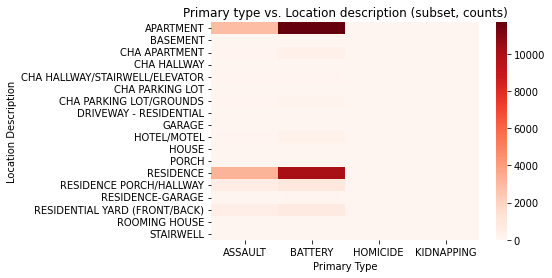

In [49]:
ax = sns.heatmap(subset_ct, cmap="Reds")
ax.set_title("Primary type vs. Location description (subset, counts)")

In [50]:
p = chi2_contingency(subset_ct)[1]
print("p-value of Chi-square test for Primary Type vs. Location (subset) =", p)

p-value of Chi-square test for Primary Type vs. Location (subset) = 0.0


In [51]:
df["hour_of_day"] = df["date_reformatted"].dt.hour

In [52]:
hod_loc_cross = pd.crosstab(df['hour_of_day'], df['Location_cat'])
hod_loc_cross

Location_cat,Airport & Related,Bank & Related,Colleges & Related,Goverment Buildings & Related,Hospitals & Related,Liquor Stores & Related,Other Locations,Public Transport & Related,Residential & Related,Stores & Related,Street & Related,Vehicles & Related
hour_of_day,,,,,,,,,,,,
0,42,160,51,102,107,338,546,128,5681,746,4163,306
1,14,36,26,75,48,373,205,138,2953,580,3169,257
2,19,49,24,47,45,309,199,123,2570,514,2765,201
3,19,44,14,35,42,204,141,130,2190,421,2107,175
4,23,40,8,27,27,62,106,139,1804,388,1679,132
5,31,25,16,23,38,16,115,103,1667,328,1405,93
6,46,30,28,76,48,11,164,129,2081,322,1660,114
7,80,40,175,62,109,10,255,185,2909,474,2131,145
8,64,98,396,159,105,11,433,228,4206,792,2796,195


Text(0.5, 1.0, 'Hour of day vs. Location description (counts)')

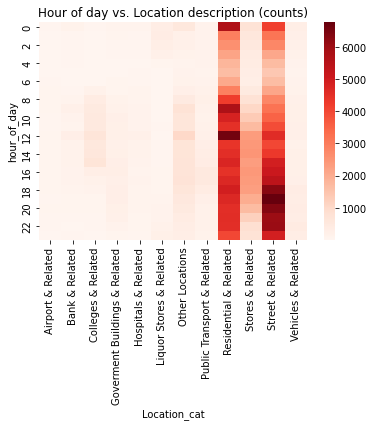

In [53]:
ax = sns.heatmap(hod_loc_cross, cmap="Reds")
ax.set_title("Hour of day vs. Location description (counts)")

In [54]:
p_hod_loc = chi2_contingency(hod_loc_cross)[1]
print("Test for independence of crime locations and hour of the day: p-value =", p_hod_loc)

Test for independence of crime locations and hour of the day: p-value = 0.0


# more info in

https://statologos.com/prueba-de-chi-cuadrado-de-la-piton-de-la-independencia/  


https://programmerclick.com/article/7791535299/